In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io
import community
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
XYZ_C = np.array( (scipy.io.loadmat('data\XYZcoord1.mat')) ['XYZ1']) #Euclidean coor
XYZ_E = np.array((pd.read_csv('data\Edges.csv')).iloc[:, 0:3].values) #geodesic coor

**<font color = blue size=7> Modularity with geodesic distance.</font>**

In [2]:
G_g = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G_g.add_weighted_edges_from([(e)])    
partition = community.best_partition(G_g)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G_g)
print("modularity:", mod)
for com in set(partition.values()) :
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
values = [partition.get(node) for node in G_g.nodes()]

community: 42.0
modularity: 0.9364008356935135


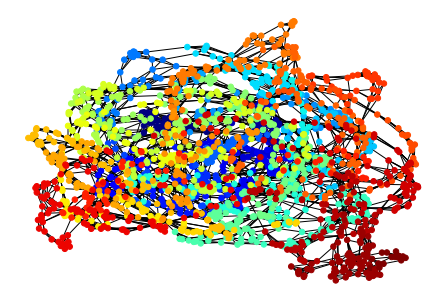

In [3]:
nx.draw_spring(G_g, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [4]:
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))       

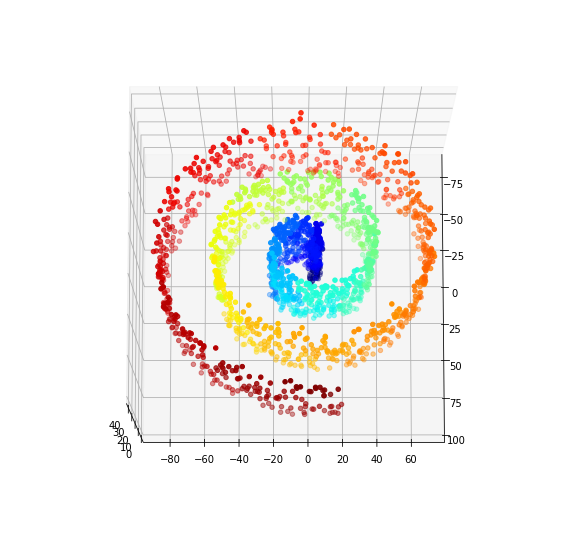

In [5]:
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

**<font color = blue size=7>Kmean with geodesic distance.</font>**

ValueError: 'c' argument has 6036 elements, which is not acceptable for use with 'x' with size 2000, 'y' with size 2000.

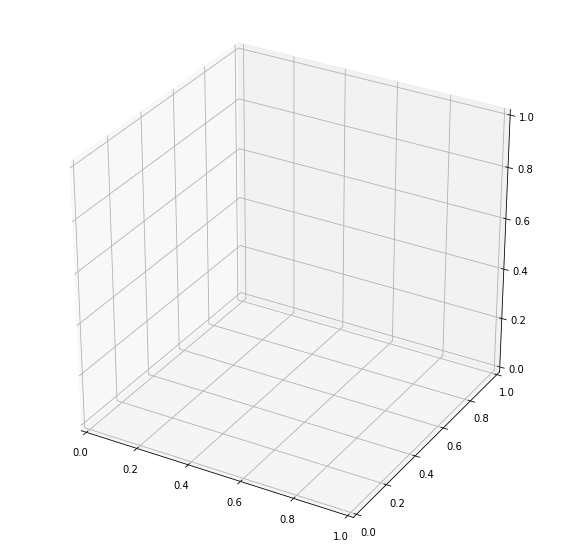

In [12]:
'''
kmeans = KMeans(n_clusters=42)
kmeans.fit(XYZ_E)
y_kmeans = kmeans.predict(XYZ_E)

fig2_1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x = XYZ_C[:,0]
y = XYZ_C[:,1]
z = XYZ_C[:,2]
c = y_kmeans
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=1)
ax.view_init(80, 0)
plt.show()
K_dict={}
for i in range(0,len(y_kmeans)):
    K_dict.setdefault(i,y_kmeans[i])
mod = community.modularity(K_dict,G_g)
print("modularity:", mod)
'''

**<font color = blue size=7> Modularity with Euclidean distance.</font>**

In [7]:
Euclidean=np.zeros([len(XYZ_C),len(XYZ_C)])
Length = 0.
G = nx.Graph()
for i in range(len(XYZ_C)):
    for j in range(i+1,len(XYZ_C)):
        if i==j:    continue
        for k in range(0,3):
            Length += (XYZ_C[j][k]-XYZ_C[i][k])**2
        Euclidean[i][j] = 1/pow(Length,0.5)
        Length = 0.
for i in range(0, len(XYZ_C)):
    for j in range(i+1,len(XYZ_C)):
        e = ( i, j, Euclidean[i][j] )
        G.add_weighted_edges_from([(e)])    
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)
for com in set(partition.values()) :
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]

community: 5.0
modularity: 0.18493134087713245


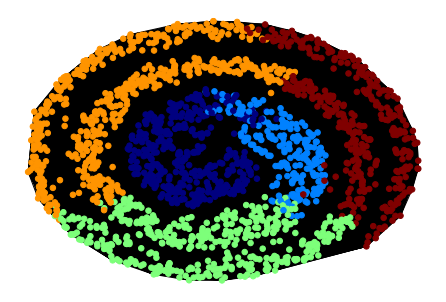

In [8]:
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show() 

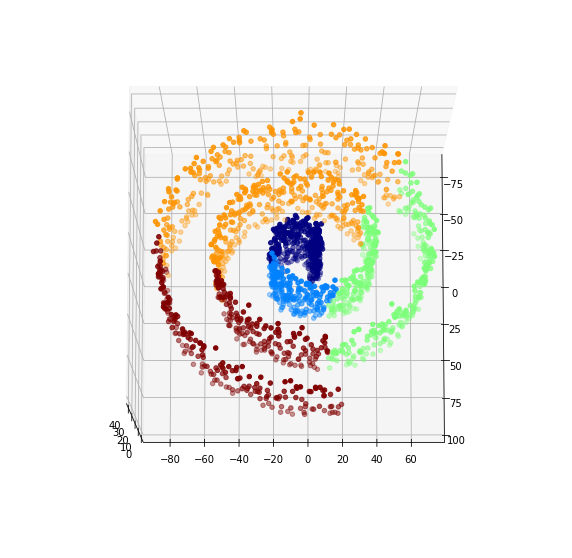

In [9]:
label = np.zeros(len(XYZ_C))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[i] == j :            
            label[i] = j
labelRE = np.reshape(label, len(XYZ_C))       
fig2 = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)
plt.show()

**<font color = blue size=7> Kmean with Euclidean distance.</font>**

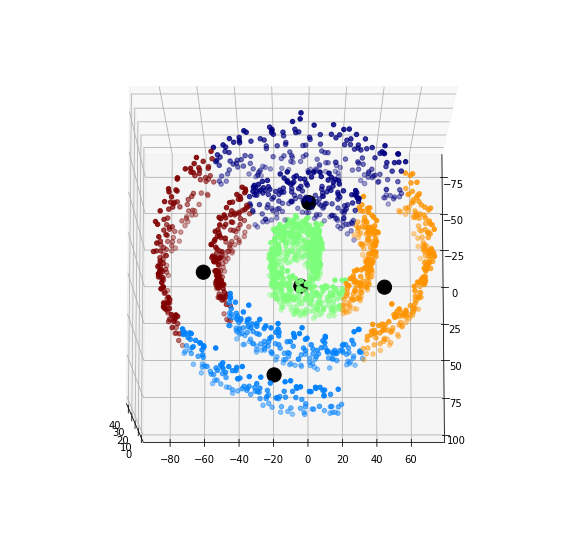

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(XYZ_C)
y_kmeans = kmeans.predict(XYZ_C)

fig2_1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x = XYZ_C[:,0]
y = XYZ_C[:,1]
z = XYZ_C[:,2]
c = y_kmeans
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=1)
ax.view_init(80, 0)
plt.show()

**<font color = blue size=7> Modularity of Kmean.</font>**

In [11]:
K_dict={}
for i in range(0,len(y_kmeans)):
    K_dict.setdefault(i,y_kmeans[i])
mod = community.modularity(K_dict,G)
print("modularity:", mod)

modularity: 0.1715902511994763
